In [1]:
import joblib
import MeCab

import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
import pandas_profiling as pdp

In [3]:
train_df = pd.read_csv('train.csv')

In [5]:
train_df.head(100
             )

item_id       user_id                 region              city  \
0   b912c3c6a6ad  e00f8ff2eaf9   –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å      –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥   
1   2dac0150717d  39aeb48f0017      –°–∞–º–∞—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å            –°–∞–º–∞—Ä–∞   
2   ba83aefab5dc  91e2f88dd6e3     –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å    –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É   
3   02996f1dd2ea  bf5cccea572d              –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω  –ù–∞–±–µ—Ä–µ–∂–Ω—ã–µ –ß–µ–ª–Ω—ã   
4   7c90be56d2ab  ef50846afc0b  –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å         –í–æ–ª–≥–æ–≥—Ä–∞–¥   
5   51e0962387f7  bbfad0b1ad0a              –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω         –ß–∏—Å—Ç–æ–ø–æ–ª—å   
6   c4f260a2b48a  08f469d2e6f7  –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥   
7   6b71309d6a8a  fef86baa002c          –ü–µ—Ä–º—Å–∫–∏–π –∫—Ä–∞–π             –ü–µ—Ä–º—å   
8   c5b969cb63a2  055825270190   –û—Ä–µ–Ω–±—É—Ä–≥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å          –û—Ä–µ–Ω–±—É—Ä–≥   
9   b1570962e68c  f9e8f831d94c  –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥   
10  d5480bb4a6e4  d46200940f37    –•–∞–Ω—Ç—ã-–ú–∞–Ω—Å–∏–π—Å–∫–∏–π –ê–û    –•–∞–Ω—Ç—ã-–ú–∞–Ω—Å–∏–π—Å–∫   
11  86f41f50d8c1  35c2b6b654e0      –¢—é–º–µ–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å      –ó–∞–≤–æ–¥–æ—É–∫–æ–≤—Å–∫   
12  645237cb3601  fc9a38b79414   –û—Ä–µ–Ω–±—É—Ä–≥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å          –û—Ä–µ–Ω–±—É—Ä–≥   
13  df2116f34563  3ce3c2318b16     –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å    –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É   
14  a97943ae8158  f643d87dd23c           –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω           –¢—É–π–º–∞–∑—ã   
15  4b6abd0a5921  94de2b374869              –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω            –ö–∞–∑–∞–Ω—å   
16  7896ef8fe482  007c6bd858cb     –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π         –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä   
17  7882b1e77748  7a3fda0cdf94  –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å       –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
18  071e1ed13c5c  325cacee50f4         –û–º—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å        –ú–æ—Å–∫–∞–ª–µ–Ω–∫–∏   
19  0658628930d4  27c2d83b766e   –ë–µ–ª–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å          –ë–µ–ª–≥–æ—Ä–æ–¥   
20  ea12aec32ec3  06ee4ff4e99c  –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å            –ë–µ—Ä–¥—Å–∫   
21  838a82cec0a6  5d44315f6d90   –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å      –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥   
22  de310e6aae86  0178e6308f38    –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å      –ú–∞–≥–Ω–∏—Ç–æ–≥–æ—Ä—Å–∫   
23  08b24e170109  6630d724bbf5     –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å    –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É   
24  065a4daba35f  19a5cd02c89b  –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥   
25  990113ae4f1c  d9b494f97062    –í–æ—Ä–æ–Ω–µ–∂—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å           –í–æ—Ä–æ–Ω–µ–∂   
26  78164bc09657  721c2f914f63      –°–∞–º–∞—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å          –¢–æ–ª—å—è—Ç—Ç–∏   
27  fbe29970a8a5  2f0e2746d462    –ö–µ–º–µ—Ä–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å       –ù–æ–≤–æ–∫—É–∑–Ω–µ—Ü–∫   
28  71d9399b59a2  965ee1e259eb    –°–∞—Ä–∞—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å           –°–∞—Ä–∞—Ç–æ–≤   
29  4941f0385575  d283308a713b  –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥   
..           ...           ...                    ...               ...   
70  120b06793d93  b117d660c9b7      –°–∞–º–∞—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å            –°–∞–º–∞—Ä–∞   
71  88b2838cc050  81885dc305dc              –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω        –ù–∏–∂–Ω–µ–∫–∞–º—Å–∫   
72  4b7ce4918084  37e85b856043              –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω            –ö–∞–∑–∞–Ω—å   
73  57d83077c16a  9e0056ae9ed3  –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥   
74  1298ab2ff7f3  b94c4c860296   –í–ª–∞–¥–∏–º–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å             –ú—É—Ä–æ–º   
75  083d89d7973b  091c29cc5b0f    –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å         –ß–µ–ª—è–±–∏–Ω—Å–∫   
76  6eccf4e3d546  e4233082f7bb      –¢—é–º–µ–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å            –¢—é–º–µ–Ω—å   
77  a58ad095e488  e9c83ca3716d      –ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫–∏–π –∫—Ä–∞–π             –ö–∞–Ω—Å–∫   
78  8b953c3f75e8  

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null object
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
dtypes: float64(3), int

In [7]:
test_df = pd.read_csv('test.csv')

In [8]:
#„Ç≥„Éº„Éâ„ÅÆ‰∏äÈôê„ÇíÁ¢∫Ë™ç
train_df["image_top_1"].max()

3066.0

In [9]:
#„Ç≥„Éº„Éâ„ÅÆ‰∏äÈôê„ÇíÁ¢∫Ë™ç
test_df["image_top_1"].max()
test_df["image_top_2"]=test_df["image_top_1"].replace(pd.np.NaN , 3067.0)

In [10]:
#image„ÅÆ„Å™„ÅÑ„ÇÇ„ÅÆ„Çí3067„ÅÆ„Ç≥„Éº„Éâ„ÇíÂâ≤„ÇäÂΩì„Å¶
train_df["image_top_2"]=train_df["image_top_1"].replace(pd.np.NaN , 3067.0)

In [11]:
train_df.head()

item_id       user_id                 region              city  \
0  b912c3c6a6ad  e00f8ff2eaf9   –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å      –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥   
1  2dac0150717d  39aeb48f0017      –°–∞–º–∞—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å            –°–∞–º–∞—Ä–∞   
2  ba83aefab5dc  91e2f88dd6e3     –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å    –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É   
3  02996f1dd2ea  bf5cccea572d              –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω  –ù–∞–±–µ—Ä–µ–∂–Ω—ã–µ –ß–µ–ª–Ω—ã   
4  7c90be56d2ab  ef50846afc0b  –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å         –í–æ–ª–≥–æ–≥—Ä–∞–¥   

  parent_category_name               category_name  \
0          –õ–∏—á–Ω—ã–µ –≤–µ—â–∏  –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π –∏ –∏–≥—Ä—É—à–∫–∏   
1      –î–ª—è –¥–æ–º–∞ –∏ –¥–∞—á–∏           –ú–µ–±–µ–ª—å –∏ –∏–Ω—Ç–µ—Ä—å–µ—Ä   
2  –ë—ã—Ç–æ–≤–∞—è —ç–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞               –ê—É–¥–∏–æ –∏ –≤–∏–¥–µ–æ   
3          –õ–∏—á–Ω—ã–µ –≤–µ—â–∏  –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π –∏ –∏–≥—Ä—É—à–∫–∏   
4            –¢—Ä–∞–Ω—Å–ø–æ—Ä—Ç                  –ê–≤—Ç–æ–º–æ–±–∏–ª–∏   

                       param_1     param_2 param_3                  title  \
0    –ü–æ—Å—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏         NaN     NaN  –ö–æ–∫–æ–±–∏(–∫–æ–∫–æ–Ω –¥–ª—è —Å–Ω–∞)   
1                       –î—Ä—É–≥–æ–µ         NaN     NaN      –°—Ç–æ–π–∫–∞ –¥–ª—è –û–¥–µ–∂–¥—ã   
2  –í–∏–¥–µ–æ, DVD –∏ Blu-ray –ø–ª–µ–µ—Ä—ã         NaN     NaN         Philips bluray   
3         –ê–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã–µ –∫—Ä–µ—Å–ª–∞         NaN     NaN             –ê–≤—Ç–æ–∫—Ä–µ—Å–ª–æ   
4                   –° –ø—Ä–æ–±–µ–≥–æ–º  –í–ê–ó (LADA)    2110         –í–ê–ó 2110, 2003   

                                         description    price  \
0  –ö–æ–∫–æ–Ω –¥–ª—è —Å–Ω–∞ –º–∞–ª—ã—à–∞,–ø–æ–ª—å–∑–æ–≤–∞–ª–∏—Å—å –º–µ–Ω—å—à–µ –º–µ—Å—è—Ü...    400.0   
1          –°—Ç–æ–π–∫–∞ –¥–ª—è –æ–¥–µ–∂–¥—ã, –ø–æ–¥ –≤–µ—à–∞–ª–∫–∏. –° –±—É—Ç–∏–∫–∞.   3000.0   
2  –í —Ö–æ—Ä–æ—à–µ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏, –¥–æ–º–∞—à–Ω–∏–π –∫–∏–Ω–æ—Ç–µ–∞—Ç—Ä —Å blu ...   4000.0   
3                             –ü—Ä–æ–¥–∞–º –∫—Ä–µ—Å–ª–æ –æ—Ç0-25–∫–≥   2200.0   
4                           –í—Å–µ –≤–æ–ø—Ä–æ—Å—ã –ø–æ —Ç–µ–ª–µ—Ñ–æ–Ω—É.  40000.0   

   item_seq_number activation_date user_type  \
0                2      2017-03-28   Private   
1               19      2017-03-26   Private   
2                9      2017-03-20   Private   
3              286      2017-03-25   Company   
4                3      2017-03-16   Private   

                                               image  image_top_1  \
0  d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...       1008.0   
1  79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...        692.0   
2  b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...       3032.0   
3  e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...        796.0   
4  54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...       2264.0   

   deal_probability  image_top_2  
0           0.12789       1008.0  
1           0.00000        692.0  
2           0.43177       3032.0  
3           0.80323        796.0  
4           0.20797       2264.0

In [12]:
#"image_top_2"Ê¨†ÊêçÂÄ§„Å™„Åó„Å´
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 19 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null object
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
image_top_2            

In [13]:
#Ê¨°„ÅØparam_1„ÅÆÊ¨†ÊêçÂÄ§„Çí‰∏ä‰ΩçÈ†ÖÁõÆ„Åß„ÅÇ„Çãcategory_name„ÅÆÊúÄÈ†ªÂÄ§„ÅßÁΩÆ„ÅçÊèõ„Åà„Çã.
#„Åæ„Åö‰∏ä‰Ωç„Ç´„ÉÜ„Ç¥„É™„ÅÆÊúÄÈ†ªÂÄ§„ÇíÁ¢∫Ë™ç
train_df.groupby('category_name').param_1.apply(lambda x: x.mode())

category_name                  
–ê–≤—Ç–æ–º–æ–±–∏–ª–∏                    0                   –° –ø—Ä–æ–±–µ–≥–æ–º
–ê—É–¥–∏–æ –∏ –≤–∏–¥–µ–æ                 0       –¢–µ–ª–µ–≤–∏–∑–æ—Ä—ã –∏ –ø—Ä–æ–µ–∫—Ç–æ—Ä—ã
–ë–∏–ª–µ—Ç—ã –∏ –ø—É—Ç–µ—à–µ—Å—Ç–≤–∏—è          0                  –ü—É—Ç–µ—à–µ—Å—Ç–≤–∏—è
–ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞               0                    –î–ª—è –∫—É—Ö–Ω–∏
–í–µ–ª–æ—Å–∏–ø–µ–¥—ã                    0                      –î–µ—Ç—Å–∫–∏–µ
–í–æ–¥–Ω—ã–π —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç              0               –ú–æ—Ç–æ—Ä–Ω—ã–µ –ª–æ–¥–∫–∏
–ì–∞—Ä–∞–∂–∏ –∏ –º–∞—à–∏–Ω–æ–º–µ—Å—Ç–∞          0                       –ü—Ä–æ–¥–∞–º
–ì–æ—Ç–æ–≤—ã–π –±–∏–∑–Ω–µ—Å                0                     –¢–æ—Ä–≥–æ–≤–ª—è
–ì—Ä—É–∑–æ–≤–∏–∫–∏ –∏ —Å–ø–µ—Ü—Ç–µ—Ö–Ω–∏–∫–∞       0                    –ì—Ä—É–∑–æ–≤–∏–∫–∏
–î–µ—Ç—Å–∫–∞—è –æ–¥–µ–∂–¥–∞ –∏ –æ–±—É–≤—å        0                  –î–ª—è –¥–µ–≤–æ—á–µ–∫
–î–æ–º–∞, –¥–∞—á–∏, –∫–æ—Ç—Ç–µ–¥–∂–∏          0                       –ü—Ä–æ–¥–∞–º
–î—Ä—É–≥–∏–µ –∂–∏–≤–æ—Ç–Ω

In [14]:
train_df.ix[train_df["category_name"] == "–ü—Ä–æ–¥—É–∫—Ç—ã –ø–∏—Ç–∞–Ω–∏—è"]

C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


item_id       user_id                 region  \
92       c2468f15b136  451e557a9de6     –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π   
229      94f9e5972f8d  be6160f26a84  –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
286      4c68d327ddc6  4bd2684f39a5  –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
334      349e640ca2ec  dc6f9054cb15  –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
433      2405102c8c4a  d8ca8703c2a1     –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π   
526      4a10ea31ee13  e2fc5ca89c8d           –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω   
677      270ca427034a  4c290a27b1f6  –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
958      9b72ace42d44  b3320688140f      –¢—é–º–µ–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
1003     dd5d676424de  6b16e497a8e2      –ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫–∏–π –∫—Ä–∞–π   
1332     65b2e8fa99db  efe2ac15c082         –ê–ª—Ç–∞–π—Å–∫–∏–π –∫—Ä–∞–π   
1392     5cd1e7e8da4d  9d7e407e0333      –ò—Ä–∫—É—Ç—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
1746     3979a81127cd  5a5cc44d3cfa  –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
1844     3e1f02bd0c4e  a1f33eb1b120      –°–∞–º–∞—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
2124     ad158072b2b8  60521a33f894               –£–¥–º—É—Ä—Ç–∏—è   
2565     33acafc5382f  8f779eb30dfa  –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
2604     fd8f6beebbf4  ee1ae52bf0d3         –ê–ª—Ç–∞–π—Å–∫–∏–π –∫—Ä–∞–π   
3189     698e3bb8eb6b  4c290a27b1f6  –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
3320     2f8328dca864  dcce3608cffb      –°–∞–º–∞—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
3481     d7340046d224  a3f2595156e6           –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω   
3655     5714b129f662  c3518b19f656   –û—Ä–µ–Ω–±—É—Ä–≥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
3757     574beab55b46  5ec7fc08e79c         –û–º—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
3843     c85f0166f88f  20907d5cab53              –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω   
3980     bbebb9093513  2d87cadc2a83    –°–∞—Ä–∞—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
3985     2ad218ece227  bd9f8deeeb0b              –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω   
4058     06784326b21d  4b9b497e0e1d      –ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫–∏–π –∫—Ä–∞–π   
4099     cd2048d8559a  1fd19537e225      –ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫–∏–π –∫—Ä–∞–π   
4223     39013af3c9de  981ec2dd8cf9  –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
4336     8c03a5f289fd  76a897311e47    –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å—Å–∫–∏–π –∫—Ä–∞–π   
4647     b0ef34abbb97  e8c86d36d54e              –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω   
4796     b20aa28db30e  848ddef330c6    –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
...               ...           ...                    ...   
1496198  c0de4438f180  f6fec25b5056   –ë–µ–ª–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
1496617  2545668538f1  d5d99419725e    –•–∞–Ω—Ç—ã-–ú–∞–Ω—Å–∏–π—Å–∫–∏–π –ê–û   
1496850  c12ec1430e39  731e2cde5eb4   –ë–µ–ª–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
1497138  92b6fe88ce91  568a0e7e2f8d  –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
1497187  b6c6d126fd79  fe9107676141     –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π   
1497281  ae5f0599a73b  18108c6607ee  –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
1498282  99b4d7281269  66e442e3cfe4    –°–∞—Ä–∞—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
1498379  cc07361e2de1  4e375eb58cc9         –û–º—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
1498417  a22f2eb44965  ac5448e7f4f7    –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å—Å–∫–∏–π –∫—Ä–∞–π   
1498534  6f4335fcb069  6f5fa83d58e9      –ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫–∏–π –∫—Ä–∞–π   
1498663  9ca5e8de0e92  c4b0462de81f    –Ø—Ä–æ—Å–ª–∞–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
1499085  524410edaa89  394949ae149a              –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω   
1499161  0ce13032899e  78aa3fe3676a      –°–∞–º–∞—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
1499162  d0f0b4ee6aa8  7fc4da8bd28d     –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π   
1499185  8f997373aee2  7174f8f2cc2a      –¢—é–º–µ–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
1499486  2112393cbbe1  b9e8efb43ca4     –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
1499952  f7bee77fcfa2  0a3e6ca8a204         –û–º—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
1500609  ed927b389a58  8d6f5d42dc7a     –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π   
1500733  c6a0c99b8603  1f5a125733ee              –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω   
1500882  44f38644a813  d84a67c0288a     –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π

In [3]:
#‰∏äË®òÁµêÊûú„Çí„ÇÇ„Å®„Å´„Ç´„ÉÜ„Ç¥„É™„Å®„Çµ„Éñ„Ç´„ÉÜ„Ç¥„É™ÊúÄÈ†ªÂÄ§„ÅÆËæûÊõ∏‰ΩúÊàê
#"–¢–æ–≤–∞—Ä—ã –¥–ª—è –∂–∏–≤–æ—Ç–Ω—ã—Ö"„ÅØ„Åô„Åπ„Å¶„ÅåNaN„Å†„Å£„Åü„Çì„ÅÆ„ÅßÂêå„Åò„ÇÇ„ÅÆ„Çí‰ª£ÂÖ•
dict = {"–ê–≤—Ç–æ–º–æ–±–∏–ª–∏":"–° –ø—Ä–æ–±–µ–≥–æ–º",
        "–ê—É–¥–∏–æ –∏ –≤–∏–¥–µ–æ":"–¢–µ–ª–µ–≤–∏–∑–æ—Ä—ã –∏ –ø—Ä–æ–µ–∫—Ç–æ—Ä—ã" ,
       "–ë–∏–ª–µ—Ç—ã –∏ –ø—É—Ç–µ—à–µ—Å—Ç–≤–∏—è":"–ü—É—Ç–µ—à–µ—Å—Ç–≤–∏—è",
       "–ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞":"–î–ª—è –∫—É—Ö–Ω–∏",
       "–í–µ–ª–æ—Å–∏–ø–µ–¥—ã":"–î–µ—Ç—Å–∫–∏–µ",
        "–í–æ–¥–Ω—ã–π —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç":"–ú–æ—Ç–æ—Ä–Ω—ã–µ –ª–æ–¥–∫–∏",
        "–ì–∞—Ä–∞–∂–∏ –∏ –º–∞—à–∏–Ω–æ–º–µ—Å—Ç–∞":"–ü—Ä–æ–¥–∞–º",
        "–ì–æ—Ç–æ–≤—ã–π –±–∏–∑–Ω–µ—Å":"–¢–æ—Ä–≥–æ–≤–ª—è",
        "–ì—Ä—É–∑–æ–≤–∏–∫–∏ –∏ —Å–ø–µ—Ü—Ç–µ—Ö–Ω–∏–∫–∞":"–ì—Ä—É–∑–æ–≤–∏–∫–∏",
        "–î–µ—Ç—Å–∫–∞—è –æ–¥–µ–∂–¥–∞ –∏ –æ–±—É–≤—å":"–î–ª—è –¥–µ–≤–æ—á–µ–∫",
        "–î–æ–º–∞, –¥–∞—á–∏, –∫–æ—Ç—Ç–µ–¥–∂–∏":"–ü—Ä–æ–¥–∞–º",
        "–î—Ä—É–≥–∏–µ –∂–∏–≤–æ—Ç–Ω—ã–µ":"–°/—Ö –∂–∏–≤–æ—Ç–Ω—ã–µ",
        "–ó–µ–º–µ–ª—å–Ω—ã–µ —É—á–∞—Å—Ç–∫–∏":"–ü—Ä–æ–¥–∞–º",
        "–ò–≥—Ä—ã, –ø—Ä–∏—Å—Ç–∞–≤–∫–∏ –∏ –ø—Ä–æ–≥—Ä–∞–º–º—ã":"–ò–≥—Ä–æ–≤—ã–µ –ø—Ä–∏—Å—Ç–∞–≤–∫–∏",
        "–ö–≤–∞—Ä—Ç–∏—Ä—ã":"–ü—Ä–æ–¥–∞–º",
        "–ö–Ω–∏–≥–∏ –∏ –∂—É—Ä–Ω–∞–ª—ã":"–ö–Ω–∏–≥–∏",
        "–ö–æ–ª–ª–µ–∫—Ü–∏–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ":"–î—Ä—É–≥–æ–µ",
        "–ö–æ–º–º–µ—Ä—á–µ—Å–∫–∞—è –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç—å":"–°–¥–∞–º",
        "–ö–æ–º–Ω–∞—Ç—ã":"–ü—Ä–æ–¥–∞–º",
        "–ö–æ—à–∫–∏":"–î—Ä—É–≥–∞—è",
        "–ö—Ä–∞—Å–æ—Ç–∞ –∏ –∑–¥–æ—Ä–æ–≤—å–µ":"–ü—Ä–∏–±–æ—Ä—ã –∏ –∞–∫—Å–µ—Å—Å—É–∞—Ä—ã",
        "–ú–µ–±–µ–ª—å –∏ –∏–Ω—Ç–µ—Ä—å–µ—Ä":"–ö—Ä–æ–≤–∞—Ç–∏, –¥–∏–≤–∞–Ω—ã –∏ –∫—Ä–µ—Å–ª–∞",
        "–ú–æ—Ç–æ—Ü–∏–∫–ª—ã –∏ –º–æ—Ç–æ—Ç–µ—Ö–Ω–∏–∫–∞":"–ú–æ—Ç–æ—Ü–∏–∫–ª—ã",
        "–ú—É–∑—ã–∫–∞–ª—å–Ω—ã–µ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã":"–ì–∏—Ç–∞—Ä—ã –∏ –¥—Ä—É–≥–∏–µ —Å—Ç—Ä—É–Ω–Ω—ã–µ",
        "–ù–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç—å –∑–∞ —Ä—É–±–µ–∂–æ–º":"–ü—Ä–æ–¥–∞–º",
        "–û–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–µ –¥–ª—è –±–∏–∑–Ω–µ—Å–∞":"–ü—Ä–æ–º—ã—à–ª–µ–Ω–Ω–æ–µ",
        "–û–¥–µ–∂–¥–∞, –æ–±—É–≤—å, –∞–∫—Å–µ—Å—Å—É–∞—Ä—ã":"–ñ–µ–Ω—Å–∫–∞—è –æ–¥–µ–∂–¥–∞",
        "–û—Ä–≥—Ç–µ—Ö–Ω–∏–∫–∞ –∏ —Ä–∞—Å—Ö–æ–¥–Ω–∏–∫–∏":"–ü—Ä–∏–Ω—Ç–µ—Ä—ã",
        "–ü–ª–∞–Ω—à–µ—Ç—ã –∏ —ç–ª–µ–∫—Ç—Ä–æ–Ω–Ω—ã–µ –∫–Ω–∏–≥–∏":"–ü–ª–∞–Ω—à–µ—Ç—ã",
        "–ü–æ—Å—É–¥–∞ –∏ —Ç–æ–≤–∞—Ä—ã –¥–ª—è –∫—É—Ö–Ω–∏":"–ü–æ—Å—É–¥–∞",
        "–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ —É—Å–ª—É–≥":"–†–µ–º–æ–Ω—Ç, —Å—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ",
        "–†–µ–º–æ–Ω—Ç –∏ —Å—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ":"–°—Ç—Ä–æ–π–º–∞—Ç–µ—Ä–∏–∞–ª—ã",
        "–°–æ–±–∞–∫–∏":"–î—Ä—É–≥–∞—è",
        "–°–ø–æ—Ä—Ç –∏ –æ—Ç–¥—ã—Ö":"–§–∏—Ç–Ω–µ—Å –∏ —Ç—Ä–µ–Ω–∞–∂—ë—Ä—ã",
        "–¢–µ–ª–µ—Ñ–æ–Ω—ã":"iPhone",
        "–¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π –∏ –∏–≥—Ä—É—à–∫–∏":"–ò–≥—Ä—É—à–∫–∏",
        "–¢–æ–≤–∞—Ä—ã –¥–ª—è –∫–æ–º–ø—å—é—Ç–µ—Ä–∞":"–ö–æ–º–ø–ª–µ–∫—Ç—É—é—â–∏–µ",
        "–§–æ—Ç–æ—Ç–µ—Ö–Ω–∏–∫–∞":"–û–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–µ –∏ –∞–∫—Å–µ—Å—Å—É–∞—Ä—ã",
        "–ß–∞—Å—ã –∏ —É–∫—Ä–∞—à–µ–Ω–∏—è":"–ß–∞—Å—ã",
        "–¢–æ–≤–∞—Ä—ã –¥–ª—è –∂–∏–≤–æ—Ç–Ω—ã—Ö":"–¢–æ–≤–∞—Ä—ã –¥–ª—è –∂–∏–≤–æ—Ç–Ω—ã—Ö",
        "–ê–∫–≤–∞—Ä–∏—É–º":"–ê–∫–≤–∞—Ä–∏—É–º",
        '–ü—Ç–∏—Ü—ã':'–ü—Ç–∏—Ü—ã',
        "–ü—Ä–æ–¥—É–∫—Ç—ã –ø–∏—Ç–∞–Ω–∏—è":"–ü—Ä–æ–¥—É–∫—Ç—ã –ø–∏—Ç–∞–Ω–∏—è",
        '–†–∞—Å—Ç–µ–Ω–∏—è':'–†–∞—Å—Ç–µ–Ω–∏—è',
        '–ù–∞—Å—Ç–æ–ª—å–Ω—ã–µ –∫–æ–º–ø—å—é—Ç–µ—Ä—ã':'–ù–∞—Å—Ç–æ–ª—å–Ω—ã–µ –∫–æ–º–ø—å—é—Ç–µ—Ä—ã',
        '–ù–æ—É—Ç–±—É–∫–∏':'–ù–æ—É—Ç–±—É–∫–∏',
        '–û—Ö–æ—Ç–∞ –∏ —Ä—ã–±–∞–ª–∫–∞':'–û—Ö–æ—Ç–∞ –∏ —Ä—ã–±–∞–ª–∫–∞'
       }



In [16]:
train_df["param1_1"] = train_df["param_1"].mask(train_df["param_1"].isnull() , train_df["category_name"].apply(lambda x : dict[x]))

In [17]:
test_df["param1_1"] = test_df["param_1"].mask(test_df["param_1"].isnull() , test_df["category_name"].apply(lambda x : dict[x]))

In [18]:
train_df.ix[train_df["param_1"].isnull()]



item_id       user_id                   region             city  \
24       065a4daba35f  19a5cd02c89b    –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å  –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥   
53       f2d19da921ff  794b7b865f1d             –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω      –°—Ç–µ—Ä–ª–∏—Ç–∞–º–∞–∫   
69       a297b829b758  a072669fe34b       –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É   
92       c2468f15b136  451e557a9de6       –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π       –ü–µ—Ç—Ä–æ–≤—Å–∫–∞—è   
120      f271b52c1d3d  68137ade713e      –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å        –ß–µ–ª—è–±–∏–Ω—Å–∫   
229      94f9e5972f8d  be6160f26a84    –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å        –í–æ–ª–≥–æ–≥—Ä–∞–¥   
249      d838fa61f744  f9f607bc9b9f      –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å     –ú–∞–≥–Ω–∏—Ç–æ–≥–æ—Ä—Å–∫   
251      ffb51686ced3  3e16aa47fc9c    –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å      –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
272      113baa0e0188  e9ab8e454a92           –ê–ª—Ç–∞–π—Å–∫–∏–π –∫—Ä–∞–π          –ë–∞—Ä–Ω–∞—É–ª   
286      4c68d327ddc6  4bd2684f39a5    –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å          –ê—Ä–∑–∞–º–∞—Å   
331      9791b99801dd  72c144a86009      –•–∞–Ω—Ç—ã-–ú–∞–Ω—Å–∏–π—Å–∫–∏–π –ê–û      –ù–µ—Ñ—Ç–µ—é–≥–∞–Ω—Å–∫   
334      349e640ca2ec  dc6f9054cb15    –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å          –ö–∞–º—ã—à–∏–Ω   
372      0fa1ba944bc1  df5eb7acce55       –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π     –ì–æ—Ä—è—á–∏–π –ö–ª—é—á   
408      e98ec1f1558f  dad180f89677      –°–∞—Ä–∞—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å          –°–∞—Ä–∞—Ç–æ–≤   
429      d7a5b8075948  a9d5924103d0      –ö–µ–º–µ—Ä–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å         –ö–µ–º–µ—Ä–æ–≤–æ   
433      2405102c8c4a  d8ca8703c2a1       –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π        –ö–æ—Ä–µ–Ω–æ–≤—Å–∫   
442      0016d94c9c65  8e32d0568904        –ò—Ä–∫—É—Ç—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å          –ò—Ä–∫—É—Ç—Å–∫   
459      ca184b17bfe4  38f0be30021f           –ê–ª—Ç–∞–π—Å–∫–∏–π –∫—Ä–∞–π          –ë–∞—Ä–Ω–∞—É–ª   
467      823a2fef6ba9  ae6586719bec    –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å      –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
509      76865def4a09  c4fbfde8617b    –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å        –î–∑–µ—Ä–∂–∏–Ω—Å–∫   
525      dc0fdc43c009  7e9c07898163      –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å     –ú–∞–≥–Ω–∏—Ç–æ–≥–æ—Ä—Å–∫   
526      4a10ea31ee13  e2fc5ca89c8d             –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω              –£—Ñ–∞   
529      7cb3c6657a46  c72398b7ebe7                 –£–¥–º—É—Ä—Ç–∏—è      –Ø–∫—à—É—Ä-–ë–æ–¥—å—è   
542      4fa514223db1  e6edf3b814ed  –ö–∞–ª–∏–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å      –ö–∞–ª–∏–Ω–∏–Ω–≥—Ä–∞–¥   
615      48d8ba83b816  78f26c4e480e      –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å—Å–∫–∏–π –∫—Ä–∞–π       –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å   
677      270ca427034a  4c290a27b1f6    –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å      –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
719      0a537f80537d  c0083e939cb4    –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å          –ò—Å–∫–∏—Ç–∏–º   
723      58d86c38b37d  818d647950cc      –í–æ—Ä–æ–Ω–µ–∂—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å          –í–æ—Ä–æ–Ω–µ–∂   
728      ca296053aa33  c360aea301a3       –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π     –ù–æ–≤–æ—Ä–æ—Å—Å–∏–π—Å–∫   
744      fe162fde19b0  bd3fa8dbba68        –°–∞–º–∞—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å           –°–∞–º–∞—Ä–∞   
...               ...           ...                      ...              ...   
1502837  470b182cc9a4  daf64f4c53b2         –¢—É–ª—å—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å             –¢—É–ª–∞   
1502843  251f02982dc7  4c9518c4ffe6        –°–∞–º–∞—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å        –ñ–∏–≥—É–ª–µ–≤—Å–∫   
1502845  1fb1312886cb  d60924adc0fe        –°–∞–º–∞—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å           –°–∞–º–∞—Ä–∞   
1502872  c65ce29b46ae  c26972bca35e      –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å        –ß–µ–ª—è–±–∏–Ω—Å–∫   
1502875  8cfb88cd682b  ddee4f64d1b9           –ê–ª—Ç–∞–π—Å–∫–∏–π –∫—Ä–∞–π          –ë–∞—Ä–Ω–∞—É–ª   
1502884  b24eed942b43  08139605b29f       –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π          –ê—Ä–º–∞–≤–∏—Ä   
1

In [19]:
parent_category_name_map = {"–õ–∏—á–Ω—ã–µ –≤–µ—â–∏" : "Personal belongings",
                            "–î–ª—è –¥–æ–º–∞ –∏ –¥–∞—á–∏" : "For the home and garden",
                            "–ë—ã—Ç–æ–≤–∞—è —ç–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞" : "Consumer electronics",
                            "–ù–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç—å" : "Real estate",
                            "–•–æ–±–±–∏ –∏ –æ—Ç–¥—ã—Ö" : "Hobbies & leisure",
                            "–¢—Ä–∞–Ω—Å–ø–æ—Ä—Ç" : "Transport",
                            "–£—Å–ª—É–≥–∏" : "Services",
                            "–ñ–∏–≤–æ—Ç–Ω—ã–µ" : "Animals",
                            "–î–ª—è –±–∏–∑–Ω–µ—Å–∞" : "For business"}

region_map = {"–°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Sverdlovsk oblast",
            "–°–∞–º–∞—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Samara oblast",
            "–†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Rostov oblast",
            "–¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω" : "Tatarstan",
            "–í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Volgograd oblast",
            "–ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Nizhny Novgorod oblast",
            "–ü–µ—Ä–º—Å–∫–∏–π –∫—Ä–∞–π" : "Perm Krai",
            "–û—Ä–µ–Ω–±—É—Ä–≥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Orenburg oblast",
            "–•–∞–Ω—Ç—ã-–ú–∞–Ω—Å–∏–π—Å–∫–∏–π –ê–û" : "Khanty-Mansi Autonomous Okrug",
            "–¢—é–º–µ–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Tyumen oblast",
            "–ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω" : "Bashkortostan",
            "–ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π" : "Krasnodar Krai",
            "–ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Novosibirsk oblast",
            "–û–º—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Omsk oblast",
            "–ë–µ–ª–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Belgorod oblast",
            "–ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Chelyabinsk oblast",
            "–í–æ—Ä–æ–Ω–µ–∂—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Voronezh oblast",
            "–ö–µ–º–µ—Ä–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Kemerovo oblast",
            "–°–∞—Ä–∞—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Saratov oblast",
            "–í–ª–∞–¥–∏–º–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Vladimir oblast",
            "–ö–∞–ª–∏–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Kaliningrad oblast",
            "–ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫–∏–π –∫—Ä–∞–π" : "Krasnoyarsk Krai",
            "–Ø—Ä–æ—Å–ª–∞–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Yaroslavl oblast",
            "–£–¥–º—É—Ä—Ç–∏—è" : "Udmurtia",
            "–ê–ª—Ç–∞–π—Å–∫–∏–π –∫—Ä–∞–π" : "Altai Krai",
            "–ò—Ä–∫—É—Ç—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Irkutsk oblast",
            "–°—Ç–∞–≤—Ä–æ–ø–æ–ª—å—Å–∫–∏–π –∫—Ä–∞–π" : "Stavropol Krai",
            "–¢—É–ª—å—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å" : "Tula oblast"}

category_map = {"–û–¥–µ–∂–¥–∞, –æ–±—É–≤—å, –∞–∫—Å–µ—Å—Å—É–∞—Ä—ã":"Clothing, shoes, accessories",
"–î–µ—Ç—Å–∫–∞—è –æ–¥–µ–∂–¥–∞ –∏ –æ–±—É–≤—å":"Children's clothing and shoes",
"–¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π –∏ –∏–≥—Ä—É—à–∫–∏":"Children's products and toys",
"–ö–≤–∞—Ä—Ç–∏—Ä—ã":"Apartments",
"–¢–µ–ª–µ—Ñ–æ–Ω—ã":"Phones",
"–ú–µ–±–µ–ª—å –∏ –∏–Ω—Ç–µ—Ä—å–µ—Ä":"Furniture and interior",
"–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ —É—Å–ª—É–≥":"Offer services",
"–ê–≤—Ç–æ–º–æ–±–∏–ª–∏":"Cars",
"–†–µ–º–æ–Ω—Ç –∏ —Å—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ":"Repair and construction",
"–ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞":"Appliances",
"–¢–æ–≤–∞—Ä—ã –¥–ª—è –∫–æ–º–ø—å—é—Ç–µ—Ä–∞":"Products for computer",
"–î–æ–º–∞, –¥–∞—á–∏, –∫–æ—Ç—Ç–µ–¥–∂–∏":"Houses, villas, cottages",
"–ö—Ä–∞—Å–æ—Ç–∞ –∏ –∑–¥–æ—Ä–æ–≤—å–µ":"Health and beauty",
"–ê—É–¥–∏–æ –∏ –≤–∏–¥–µ–æ":"Audio and video",
"–°–ø–æ—Ä—Ç –∏ –æ—Ç–¥—ã—Ö":"Sports and recreation",
"–ö–æ–ª–ª–µ–∫—Ü–∏–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ":"Collecting",
"–û–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–µ –¥–ª—è –±–∏–∑–Ω–µ—Å–∞":"Equipment for business",
"–ó–µ–º–µ–ª—å–Ω—ã–µ —É—á–∞—Å—Ç–∫–∏":"Land",
"–ß–∞—Å—ã –∏ —É–∫—Ä–∞—à–µ–Ω–∏—è":"Watches and jewelry",
"–ö–Ω–∏–≥–∏ –∏ –∂—É—Ä–Ω–∞–ª—ã":"Books and magazines",
"–°–æ–±–∞–∫–∏":"Dogs",
"–ò–≥—Ä—ã, –ø—Ä–∏—Å—Ç–∞–≤–∫–∏ –∏ –ø—Ä–æ–≥—Ä–∞–º–º—ã":"Games, consoles and software",
"–î—Ä—É–≥–∏–µ –∂–∏–≤–æ—Ç–Ω—ã–µ":"Other animals",
"–í–µ–ª–æ—Å–∏–ø–µ–¥—ã":"Bikes",
"–ù–æ—É—Ç–±—É–∫–∏":"Laptops",
"–ö–æ—à–∫–∏":"Cats",
"–ì—Ä—É–∑–æ–≤–∏–∫–∏ –∏ —Å–ø–µ—Ü—Ç–µ—Ö–Ω–∏–∫–∞":"Trucks and buses",
"–ü–æ—Å—É–¥–∞ –∏ —Ç–æ–≤–∞—Ä—ã –¥–ª—è –∫—É—Ö–Ω–∏":"Tableware and goods for kitchen",
"–†–∞—Å—Ç–µ–Ω–∏—è":"Plants",
"–ü–ª–∞–Ω—à–µ—Ç—ã –∏ —ç–ª–µ–∫—Ç—Ä–æ–Ω–Ω—ã–µ –∫–Ω–∏–≥–∏":"Tablets and e-books",
"–¢–æ–≤–∞—Ä—ã –¥–ª—è –∂–∏–≤–æ—Ç–Ω—ã—Ö":"Pet products",
"–ö–æ–º–Ω–∞—Ç—ã":"Room",
"–§–æ—Ç–æ—Ç–µ—Ö–Ω–∏–∫–∞":"Photo",
"–ö–æ–º–º–µ—Ä—á–µ—Å–∫–∞—è –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç—å":"Commercial property",
"–ì–∞—Ä–∞–∂–∏ –∏ –º–∞—à–∏–Ω–æ–º–µ—Å—Ç–∞":"Garages and Parking spaces",
"–ú—É–∑—ã–∫–∞–ª—å–Ω—ã–µ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã":"Musical instruments",
"–û—Ä–≥—Ç–µ—Ö–Ω–∏–∫–∞ –∏ —Ä–∞—Å—Ö–æ–¥–Ω–∏–∫–∏":"Office equipment and consumables",
"–ü—Ç–∏—Ü—ã":"Birds",
"–ü—Ä–æ–¥—É–∫—Ç—ã –ø–∏—Ç–∞–Ω–∏—è":"Food",
"–ú–æ—Ç–æ—Ü–∏–∫–ª—ã –∏ –º–æ—Ç–æ—Ç–µ—Ö–Ω–∏–∫–∞":"Motorcycles and bikes",
"–ù–∞—Å—Ç–æ–ª—å–Ω—ã–µ –∫–æ–º–ø—å—é—Ç–µ—Ä—ã":"Desktop computers",
"–ê–∫–≤–∞—Ä–∏—É–º":"Aquarium",
"–û—Ö–æ—Ç–∞ –∏ —Ä—ã–±–∞–ª–∫–∞":"Hunting and fishing",
"–ë–∏–ª–µ—Ç—ã –∏ –ø—É—Ç–µ—à–µ—Å—Ç–≤–∏—è":"Tickets and travel",
"–í–æ–¥–Ω—ã–π —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç":"Water transport",
"–ì–æ—Ç–æ–≤—ã–π –±–∏–∑–Ω–µ—Å":"Ready business",
"–ù–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç—å –∑–∞ —Ä—É–±–µ–∂–æ–º":"Property abroad"}

train_df['region_en'] = train_df['region'].apply(lambda x : region_map[x])
train_df['parent_category_name_en'] = train_df['parent_category_name'].apply(lambda x : parent_category_name_map[x])
train_df['category_name_en'] = train_df['category_name'].apply(lambda x : category_map[x])

In [20]:

test_df['region_en'] = test_df['region'].apply(lambda x : region_map[x])
test_df['parent_category_name_en'] = test_df['parent_category_name'].apply(lambda x : parent_category_name_map[x])
test_df['category_name_en'] = test_df['category_name'].apply(lambda x : category_map[x])

In [21]:
#param1_1„ÅßÊ¨†Êêç„Åå„Å™„Åè„Å™„Å£„Åü„ÅÆ„ÅßÊ¨°„ÅØprice„ÅÆÁ¢∫Ë™ç
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 23 columns):
item_id                    1503424 non-null object
user_id                    1503424 non-null object
region                     1503424 non-null object
city                       1503424 non-null object
parent_category_name       1503424 non-null object
category_name              1503424 non-null object
param_1                    1441848 non-null object
param_2                    848882 non-null object
param_3                    640859 non-null object
title                      1503424 non-null object
description                1387148 non-null object
price                      1418062 non-null float64
item_seq_number            1503424 non-null int64
activation_date            1503424 non-null object
user_type                  1503424 non-null object
image                      1390836 non-null object
image_top_1                1390836 non-null float64
deal_probability     

In [22]:
train_df.ix[train_df["price"].isnull()].head()


item_id       user_id                 region             city  \
24  065a4daba35f  19a5cd02c89b  –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å  –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥   
30  af9d5b0eadc9  ff3f46835373     –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å            –ê–∫—Å–∞–π   
60  fc21a86b9bb0  ab36081b2db1              –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω     –ó–µ–ª–µ–Ω–æ–¥–æ–ª—å—Å–∫   
69  a297b829b758  a072669fe34b     –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É   
74  1298ab2ff7f3  b94c4c860296   –í–ª–∞–¥–∏–º–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å            –ú—É—Ä–æ–º   

   parent_category_name           category_name                param_1  \
24             –ñ–∏–≤–æ—Ç–Ω—ã–µ     –¢–æ–≤–∞—Ä—ã –¥–ª—è –∂–∏–≤–æ—Ç–Ω—ã—Ö                    NaN   
30      –î–ª—è –¥–æ–º–∞ –∏ –¥–∞—á–∏  –†–µ–º–æ–Ω—Ç –∏ —Å—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ         –°—Ç—Ä–æ–π–º–∞—Ç–µ—Ä–∏–∞–ª—ã   
60               –£—Å–ª—É–≥–∏       –ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ —É—Å–ª—É–≥  –†–µ–º–æ–Ω—Ç, —Å—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ   
69             –ñ–∏–≤–æ—Ç–Ω—ã–µ                   –ü—Ç–∏—Ü—ã                    NaN   
74               –£—Å–ª—É–≥–∏       –ü—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ —É—Å–ª—É–≥          –ú–∞—Å—Ç–µ—Ä –Ω–∞ —á–∞—Å   

                           param_2 param_3  \
24                             NaN     NaN   
30                             NaN     NaN   
60  –°—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ –¥–æ–º–æ–≤, –∫–æ—Ç—Ç–µ–¥–∂–µ–π     NaN   
69                             NaN     NaN   
74                             NaN     NaN   

                                  title           ...             \
24                    –¢–∞–±–ª–µ—Ç–∫–∏ –±—Ä–∞–≤–µ–∫—Ç–æ           ...              
30                      –§–∞—Å–∞–¥–Ω—ã–µ –ø–∞–Ω–µ–ª–∏           ...              
60  –ë—ã—Å—Ç—Ä–æ–≤–æ–∑–≤–æ–¥–∏–º—ã–µ –∫–∞—Ä–∫–∞—Å–Ω—ã–µ —Å—Ç—Ä–æ–µ–Ω–∏—è           ...              
69   "–ò–Ω–¥–∏–π—Å–∫–∏–π –±–µ–≥—É–Ω" –±–æ–ª—å—à–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞           ...              
74                –ú—É–∂ –Ω–∞ —á–∞—Å –∏–ª–∏ –¥–æ–ª—å—à–µ           ...              

   activation_date  user_type  \
24      2017-03-16    Company   
30      2017-03-25    Private   
60      2017-03-19    Private   
69      2017-03-20    Company   
74      2017-03-28    Company   

                                                image image_top_1  \
24  22babf609cfcbca6b1d5ca81321fd6f58e873903c8fc0a...       843.0   
30  fb5c2ee81f10750f4142d2028707a779c7e95576bb180d...      1282.0   
60                                                NaN         NaN   
69                                                NaN         NaN   
74                                                NaN         NaN   

   deal_probability image_top_2               param1_1  \
24              0.0       843.0    –¢–æ–≤–∞—Ä—ã –¥–ª—è –∂–∏–≤–æ—Ç–Ω—ã—Ö   
30              0.0      1282.0         –°—Ç—Ä–æ–π–º–∞—Ç–µ—Ä–∏–∞–ª—ã   
60              0.8      3067.0  –†–µ–º–æ–Ω—Ç, —Å—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ   
69              0.0      3067.0                  –ü—Ç–∏—Ü—ã   
74              0.5      3067.0          –ú–∞—Å—Ç–µ—Ä –Ω–∞ —á–∞—Å   

                 region_en  parent_category_name_en         category_name_en  
24  Nizhny Novgorod oblast                  Animals             Pet products  
30           Rostov oblast  For the home and garden  Repair and construction  
60               Tatarstan                 Services           Offer services  
69           Rostov oblast                  Animals                    Birds  
74         Vladimir oblast                 Services           Offer services  

[5 rows x 23 columns]

In [23]:
#„Ç´„É©„É†ÂÜÖ„ÅÆÊñáÂ≠óÊï∞„ÄÇ„Éá„Éï„Ç©„É´„Éà„ÅØ50„Å†„Å£„Åü
pd.set_option("display.max_colwidth", 1000000)

In [24]:
#Ë¶ã„Å¶„Åø„Çã„Å®description„Å´ÂÄ§ÊÆµ„ÅåÊõ∏„ÅÑ„Å¶„ÅÇ„Çã„ÇÇ„ÅÆ„ÇÇ„ÅÇ„Çã„Åå„ÄÇ„ÄÇ
train_df.ix[69]

item_id                                                                                                                                                            a297b829b758
user_id                                                                                                                                                            a072669fe34b
region                                                                                                                                                       –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å
city                                                                                                                                                             –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É
parent_category_name                                                                                                                                                   –ñ–∏–≤–æ—Ç–Ω—ã–µ
category_name                                                                      

In [25]:
#'param1_1'ÊØé„ÅÆÂπ≥Âùáprice„ÅÆdict‰ΩúÊàê
a = train_df.groupby('param1_1').price.apply(lambda x: x.mean())
b = pd.DataFrame(a)
b["price"] = b["price"].mask(b["price"].isnull(),0)
c = b.to_dict()
price_dict = c['price']

In [26]:
price_dict['–ü–æ—Å—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏']

1245.8142725030825

In [27]:
#‰∏ÄÊó¶param_1_1„ÅåÂêå„Åò„ÇÇ„ÅÆ„ÅÆÂπ≥ÂùáÂÄ§„Çí‰ª£ÂÖ•
train_df["price_2"] = train_df["price"].mask(train_df["price"].isnull() , train_df["param1_1"].apply(lambda x : price_dict[x]))

In [28]:
#‰∏ÄÊó¶param_1_1„ÅåÂêå„Åò„ÇÇ„ÅÆ„ÅÆÂπ≥ÂùáÂÄ§„Çí‰ª£ÂÖ•
test_df["price_2"] = test_df["price"].mask(test_df["price"].isnull() , test_df["param1_1"].apply(lambda x : price_dict[x]))

In [29]:
#"price_2"Ê¨†ÊêçÂÄ§„Å™„Åó„Å´
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 24 columns):
item_id                    1503424 non-null object
user_id                    1503424 non-null object
region                     1503424 non-null object
city                       1503424 non-null object
parent_category_name       1503424 non-null object
category_name              1503424 non-null object
param_1                    1441848 non-null object
param_2                    848882 non-null object
param_3                    640859 non-null object
title                      1503424 non-null object
description                1387148 non-null object
price                      1418062 non-null float64
item_seq_number            1503424 non-null int64
activation_date            1503424 non-null object
user_type                  1503424 non-null object
image                      1390836 non-null object
image_top_1                1390836 non-null float64
deal_probability     

<p>‚ñº„Ç´„ÉÜ„Ç¥„É™„ÅÆÂêçÂâç„ÇíËã±Ë™û„Å´Â§âÊèõ</p>

In [30]:
#title,description‰ª•Â§ñ„ÅÆÂøÖË¶Å„Å™Âàó„ÇíÂèñ„ÇäÂá∫„Åó
train_df2 = train_df[["region_en", "city","parent_category_name_en","category_name_en","param1_1","price_2","activation_date","user_type","image_top_2"]]

In [31]:
#title,description‰ª•Â§ñ„ÅÆÂøÖË¶Å„Å™Âàó„ÇíÂèñ„ÇäÂá∫„Åó
test_df2 = test_df[["region_en", "city","parent_category_name_en","category_name_en","param1_1","price_2","activation_date","user_type","image_top_2"]]

In [32]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508438 entries, 0 to 508437
Data columns (total 9 columns):
region_en                  508438 non-null object
city                       508438 non-null object
parent_category_name_en    508438 non-null object
category_name_en           508438 non-null object
param1_1                   508438 non-null object
price_2                    508438 non-null float64
activation_date            508438 non-null object
user_type                  508438 non-null object
image_top_2                508438 non-null float64
dtypes: float64(2), object(7)
memory usage: 34.9+ MB


<p>‚ñºÊó•‰ªò„Éá„Éº„Çø„ÇíÂπ¥„ÉºÊúà„ÉºÊó•„Å´Â§âÊèõ</p>

In [33]:
#strÂûã„Åã„ÇâtimestampÂûã„Å´
train_df2["activation_date"] = pd.to_datetime(train_df2["activation_date"])
test_df2["activation_date"] = pd.to_datetime(test_df2["activation_date"])


C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
#timestampÂûã„Åã„Çâ„ÄÅÂπ¥„ÄÅÊúà„ÄÅÊó•„Çí„Å®„Çã
#yaer „Å®month„ÅØÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„Åå‰Ωé„Åã„Å£„Åü„ÅÆ„Åß‰ªäÂõû„ÅØÂâäÈô§
#train_df2["year"] = train_df2["activation_date"].dt.year
#train_df2["month"] = train_df2["activation_date"].dt.month
train_df2["day"] = train_df2["activation_date"].dt.day
train_df2["dayofweek"] = train_df2["activation_date"].dt.dayofweek

C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
#timestampÂûã„Åã„Çâ„ÄÅÂπ¥„ÄÅÊúà„ÄÅÊó•„Çí„Å®„Çã
#yaer „Å®month„ÅØÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„Åå‰Ωé„Åã„Å£„Åü„ÅÆ„Åß‰ªäÂõû„ÅØÂâäÈô§
#test_df2["year"] = test_df2["activation_date"].dt.year
#test_df2["month"] = test_df2["activation_date"].dt.month
test_df2["day"] = test_df2["activation_date"].dt.day
test_df2["dayofweek"] = test_df2["activation_date"].dt.dayofweek

C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<p>‚ñºlabelencoder„Åß„Ç´„ÉÜ„Ç¥„É™„Ç´„É´Â§âÊï∞„ÇíÊï∞ÂÄ§„Å´ÁΩÆ„ÅçÊèõ„Åà</p>

In [36]:
from sklearn import preprocessing

cat_vars = [ "region_en", "city", "parent_category_name_en", "category_name_en", "param1_1","activation_date","user_type"]
for col in cat_vars:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df2[col].values.astype('str')))
    train_df2[col] = lbl.transform(list(train_df2[col].values.astype('str')))

C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [37]:
from sklearn import preprocessing

cat_vars = [ "region_en", "city", "parent_category_name_en", "category_name_en", "param1_1","activation_date","user_type"]
for col in cat_vars:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(test_df2[col].values.astype('str')))
    test_df2[col] = lbl.transform(list(test_df2[col].values.astype('str')))

C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [38]:
train_df2.head()

region_en  city  parent_category_name_en  category_name_en  param1_1  \
0         19   460                        5                10       252   
1         16  1300                        3                18       122   
2         15  1276                        1                 3        84   
3         20   940                        5                10        37   
4         25   317                        8                 7       284   

   price_2  activation_date  user_type  image_top_2  day  dayofweek  
0    400.0               13          1       1008.0   28          1  
1   3000.0               11          1        692.0   26          6  
2   4000.0                5          1       3032.0   20          0  
3   2200.0               10          0        796.0   25          5  
4  40000.0                1          1       2264.0   16          3

In [39]:
test_df2.head()

region_en  city  parent_category_name_en  category_name_en  param1_1  \
0         25   306                        5                 9       108   
1         19   933                        4                 4       117   
2         11   147                        1                 3       316   
3         17  1238                        3                 1       106   
4         13   236                        5                10       100   

        price_2  activation_date  user_type  image_top_2  day  dayofweek  
0  15445.063921                6          1       2020.0   18          1  
1   3000.000000                4          1       3067.0   16          6  
2  15000.000000                5          1       2960.0   17          0  
3   4500.000000                5          1       3067.0   17          0  
4   4900.000000                3          1       1002.0   15          5

<p>‚ñºËá™ÁÑ∂Ë®ÄË™ûÂá¶ÁêÜ</p>

In [42]:
#Ëá™ÁÑ∂Ë®ÄË™ûÂá¶ÁêÜÔºàTF-IDF„ÅÆÂÆüÊñΩÔºâ
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")

In [43]:
#train, test„ÇíÁµêÂêà„ÅóÂÖÉ„Éá„Éº„Çø„Çí‰ΩúÊàê„ÄÅTF-IDF„Å´„Åã„Åë„Çã
mix_df = pd.concat([train_df, test_df])
mix_df["title"]=mix_df["title"].astype(str)
X1 = vectorizer.fit_transform(mix_df["title"])

mix_df["description"]=mix_df["description"].astype(str)
X2 = vectorizer.fit_transform(mix_df["description"])


In [44]:
#Ê¨°ÂÖÉÂâäÊ∏õ
#ÂàóÊï∞10‚Üí300„Å´Â§âÊõ¥
import scipy.sparse as sparse
from sklearn.decomposition import NMF, TruncatedSVD
svd = TruncatedSVD(n_components=300)

In [ ]:
title_svd = svd.fit_transform(X1)

In [46]:
title_svd = pd.DataFrame(title_svd)

In [47]:
description_svd = svd.fit_transform(X2)

In [48]:
description_svd = pd.DataFrame(description_svd)

In [50]:
#trainÈÉ®ÂàÜ„ÇíÂàÜÂâ≤
title_svd_1 = title_svd.iloc[0:1503424]
description_svd_1 = description_svd.iloc[0:1503424]

In [51]:
#testÈÉ®ÂàÜ„ÇíÂàÜÂâ≤„ÄÅundex„ÇíÊèÉ„Åà„Çã
title_svd_2 = title_svd.iloc[1503424:]
title_svd_2 = title_svd_2.reset_index(drop=True)
description_svd_2 = description_svd.iloc[1503424:]
description_svd_2 = description_svd_2.reset_index(drop=True)

In [55]:
title_svd_1.head()

0         1         2         3         4         5         6  \
0  0.000814  0.006459  0.008007  0.021395  0.033166  0.059540 -0.086702   
1  0.001451  0.010457  0.013535  0.034781  0.054099  0.097267 -0.141259   
2  0.000038  0.000028  0.000110  0.000068  0.000272  0.000479  0.000234   
3  0.000222  0.000225  0.000141  0.000237  0.001153  0.002011  0.002290   
4  0.000033 -0.000004 -0.000259 -0.000147 -0.000194  0.001756 -0.000768   

          7         8         9  
0 -0.053309  0.060064 -0.026006  
1 -0.087398  0.097129 -0.042242  
2 -0.000216  0.000082  0.000037  
3 -0.000410  0.000470  0.000421  
4  0.001622  0.002638  0.004835

In [178]:
#„ÉÄ„Éü„ÉºÂ§âÊï∞Âåñ„Åó„Åüdf„Å®Ê¨°ÂÖÉÂâäÊ∏õ„Åó„Åü„Å§„ÅÆ„Éá„Éº„Çø„Çí„Éû„Éº„Ç∏
train_df3 = pd.concat([train_df2, title_svd_1, description_svd_1], axis=1)

In [193]:
pd.set_option('display.max_columns', 100)
train_df3.head()


region_en  city  parent_category_name_en  category_name_en  param1_1  \
0         19   460                        5                10       252   
1         16  1300                        3                18       122   
2         15  1276                        1                 3        84   
3         20   940                        5                10        37   
4         25   317                        8                 7       284   

   price_2  activation_date  user_type  image_top_2  day  dayofweek         0  \
0    400.0               13          1       1008.0   28          1  0.000814   
1   3000.0               11          1        692.0   26          6  0.001451   
2   4000.0                5          1       3032.0   20          0  0.000038   
3   2200.0               10          0        796.0   25          5  0.000222   
4  40000.0                1          1       2264.0   16          3  0.000033   

          1         2         3         4         5         6         7  \
0  0.006459  0.008007  0.021395  0.033166  0.059540 -0.086702 -0.053309   
1  0.010457  0.013535  0.034781  0.054099  0.097267 -0.141259 -0.087398   
2  0.000028  0.000110  0.000068  0.000272  0.000479  0.000234 -0.000216   
3  0.000225  0.000141  0.000237  0.001153  0.002011  0.002290 -0.000410   
4 -0.000004 -0.000259 -0.000147 -0.000194  0.001756 -0.000768  0.001622   

          8         9             0         1         2         3         4  \
0  0.060064 -0.026006  5.837577e-07  0.032525 -0.035163 -0.013662  0.004732   
1  0.097129 -0.042242  7.722831e-07  0.038687 -0.048400 -0.038423 -0.013670   
2  0.000082  0.000037  1.000433e-06  0.161102  0.066152  0.004971 -0.097954   
3  0.000470  0.000421  1.304437e-06  0.029637 -0.016589  0.010268  0.019318   
4  0.002638  0.004835  3.108071e-06  0.115614 -0.132284 -0.118575 -0.124822   

          5         6         7         8         9  
0 -0.002438  0.003206 -0.019636 -0.018090 -0.003565  
1  0.016834  0.003959 -0.025877 -0.020491 -0.006804  
2 -0.014941 -0.003172  0.065103 -0.016486 -0.070267  
3 -0.043269  0.024131  0.065549 -0.094862  0.085132  
4  0.101123 -0.024718  0.471734  0.560761  0.360623

In [180]:
#„ÉÄ„Éü„ÉºÂ§âÊï∞Âåñ„Åó„Åüdf„Å®Ê¨°ÂÖÉÂâäÊ∏õ„Åó„Åü„Å§„ÅÆ„Éá„Éº„Çø„Çí„Éû„Éº„Ç∏
test_df3= pd.concat([test_df2, title_svd_2, description_svd_2], axis=1)

In [181]:
test_df3.head()


region_en  city  parent_category_name_en  category_name_en  param1_1  \
0         25   306                        5                 9       108   
1         19   933                        4                 4       117   
2         11   147                        1                 3       316   
3         17  1238                        3                 1       106   
4         13   236                        5                10       100   

        price_2  activation_date  user_type  image_top_2  day  dayofweek  \
0  15445.063921                6          1       2020.0   18          1   
1   3000.000000                4          1       3067.0   16          6   
2  15000.000000                5          1       2960.0   17          0   
3   4500.000000                5          1       3067.0   17          0   
4   4900.000000                3          1       1002.0   15          5   

          0         1         2         3         4         5         6  \
0  0.000360  0.000334  0.000516  0.000758  0.002018  0.001851 -0.000470   
1  0.003456  0.042812  0.024903  0.030263  0.206031  0.310617  0.410624   
2  0.000048  0.000008  0.000003  0.000016  0.000079  0.000127  0.000148   
3  0.009392  0.000131  0.008434 -0.001616 -0.000504 -0.000091 -0.000628   
4  0.002799  0.001518  0.002402  0.013467  0.005678  0.019370 -0.014463   

          7         8         9             0         1         2         3  \
0 -0.002170  0.001052 -0.000782  3.438658e-07  0.036883 -0.049645 -0.023159   
1 -0.042290  0.030971  0.035990  2.565219e-06  0.179942 -0.000791 -0.019656   
2 -0.000055  0.000022  0.000017  2.011309e-06  0.093820 -0.057139 -0.033666   
3 -0.000816 -0.004793 -0.000583  1.141797e-06  0.056794 -0.019060 -0.012503   
4  0.004048  0.033556 -0.004085  7.804422e-06  0.152203 -0.128466 -0.032407   

          4         5         6         7         8         9  
0  0.004766 -0.005366 -0.012128 -0.027605 -0.019727  0.003964  
1 -0.046652  0.024704  0.033091  0.330742  0.091676  0.086854  
2  0.007197 -0.012199  0.006206  0.018752 -0.080393  0.024052  
3  0.006049 -0.011674  0.007263  0.027300 -0.057239  0.032812  
4 -0.036264 -0.076565  0.344567  0.252560  0.246647  0.246215

In [162]:
#ÁµêÊßãÁâπÂæ¥Èáè„ÇíÂâäÈô§„Åó„Åü„ÇÑ„Å§

train_df5 = train_df5.drop("user_type",axis = 1)
train_df5.head()
train_df6 = np.array(train_df5)



In [166]:
#ÁµêÊßãÁâπÂæ¥Èáè„ÇíÂâäÈô§„Åó„Åü„ÇÑ„Å§

test_df5 = test_df5.drop("day",axis = 1)
test_df5.head()
test_df6 = np.array(test_df5)



In [182]:
train_df4 = np.array(train_df3)

In [192]:
test_df4 = np.array(test_df3)

In [65]:
deal_probability = train_df["deal_probability"].values

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df4, deal_probability, test_size=0.3)

In [205]:
# ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
from sklearn.ensemble import RandomForestRegressor
# „É¢„Éá„É´ÊßãÁØâ„ÄÅ„Éë„É©„É°„Éº„Çø„ÅØ„Éá„Éï„Ç©„É´„Éà
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [206]:
# ‰∫àÊ∏¨ÂÄ§„ÇíË®àÁÆó
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
# MSE„ÅÆË®àÁÆó
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
# R^2„ÅÆË®àÁÆó
from sklearn.metrics import r2_score
print('r2_score train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))


MSE train : 0.010, test : 0.058
r2_score train : 0.847, test : 0.144


In [207]:
from sklearn.grid_search import GridSearchCV

In [ ]:
#„Éë„É©„É°„Éº„Çø„ÅÆÊï∞„ÅÆÊéõ„ÅëÁÆó„ÅÆÂõûÊï∞„ÇíÊÄùËÄÉ„Åô„Çã
#n_estimators 30,50,100,200
#max_depth 5,6,7,8
#CV 3,5
#n_jobs -1„Å´„Åô„Çã„Å®Âá¶ÁêÜ„ÅåÊó©„Åè„Å™„ÇãÂ†¥Âêà„Åå„ÅÇ„Çã
# 'max_features'      : [15,  25],

parameters = {
        'n_estimators'      : [40,50],
        'n_jobs'            : [-1],
        'max_depth'         : [10,11]
}

forest_grid = GridSearchCV(RandomForestRegressor(), parameters)

forest_grid.fit(X_train,y_train) #fit

forest_grid_best = forest_grid.best_estimator_ #best estimator
print("Best Model Parameter: ",forest_grid.best_params_)

30,7
30,8
40,10


In [127]:
% matplotlib inline

from __future__ import print_function

import copy

import matplotlib
import matplotlib.pyplot as plt

In [132]:
feature_cols = [col for col in train_df3.columns ]

In [133]:
def varImpPlot(clf, feature_names, topN = 10, verbose = True):
    feature_names = np.array(feature_names)
    feature_importance = clf.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    
    topN_feature = feature_importance[sorted_idx][len(feature_importance) - topN:]
    topN_feature_name = feature_names[sorted_idx][len(feature_importance) - topN:]
    pos = np.arange(topN) + .5
    plt.barh(pos, topN_feature, align='center')
    plt.yticks(pos, topN_feature_name)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    
    rev_sorted_idx = np.argsort(feature_importance)[::-1]
    if verbose:
        for i, v in zip(feature_names[rev_sorted_idx], feature_importance[rev_sorted_idx]):
            print(i, v)

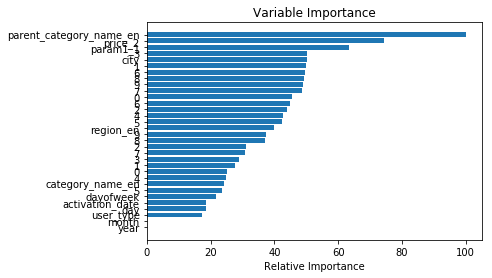

parent_category_name_en 100.0
price_2 74.4638817016
param1_1 63.3354704552
3 50.3317003591
city 50.2128554046
1 49.7774017626
6 49.6469554442
8 49.1387280125
9 48.868142512
7 48.6805620995
0 45.4493915561
6 44.914292863
2 44.0046877926
4 42.5997344137
5 42.2499230737
region_en 40.0292449144
9 37.3004618123
8 37.2000650249
2 31.205145626
7 30.7050643446
3 28.7518907504
1 27.5740902237
0 24.9970539224
4 24.8276589584
category_name_en 24.2534674145
5 23.6159047005
dayofweek 21.786560102
activation_date 18.6555533194
day 18.5181844958
user_type 17.288236107
month 0.00297681452404
year 0.0


In [134]:
varImpPlot(forest, feature_cols, topN=32)

In [130]:
feature_importance = forest.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_cols_ar = np.array(feature_cols)
new_feature_cols = feature_cols_ar[feature_importance > 0]
new_feature_cols

NameError: name 'feature_cols' is not defined

In [303]:
train_df2[new_feature_cols].head()

KeyError: '[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25\n 26 27 28 29 30 31] not in index'

In [363]:
# ‰∫àÊ∏¨ÂÄ§„ÇíË®àÁÆó
test_df_pred = forest.predict(test_df4)


In [218]:
test_df_pred

array([ 0.04566   ,  0.45510735,  0.079783  , ...,  0.045271  ,
        0.47      ,  0.065116  ])

In [393]:
s = pd.Series(test_df_pred)
s.head()

0    0.047015
1    0.758867
2    0.176909
3    0.241810
4    0.327822
dtype: float64

In [365]:
test_df["item_id"].head()

0    6544e41a8817
1    65b9484d670f
2    8bab230b2ecd
3    8e348601fefc
4    8bd2fe400b89
Name: item_id, dtype: object

In [366]:
submission = pd.concat([test_df["item_id"], s], axis=1)
submission.head()

item_id         0
0  6544e41a8817  0.047015
1  65b9484d670f  0.758867
2  8bab230b2ecd  0.176909
3  8e348601fefc  0.241810
4  8bd2fe400b89  0.327822

In [367]:
submission = submission.rename(columns={0: 'deal_probability'})
submission.head()

item_id  deal_probability
0  6544e41a8817          0.047015
1  65b9484d670f          0.758867
2  8bab230b2ecd          0.176909
3  8e348601fefc          0.241810
4  8bd2fe400b89          0.327822

In [368]:
submission.to_csv("submission1.csv",index=False)

In [66]:
test_df = pd.read_csv("test.csv")
test_df.head()

item_id       user_id                 region         city  \
0  6544e41a8817  dbe73ad6e4b5  –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å    –í–æ–ª–≥–æ–≥—Ä–∞–¥   
1  65b9484d670f  2e11806abe57   –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å  –ù–∏–∂–Ω—è—è –¢—É—Ä–∞   
2  8bab230b2ecd  0b850bbebb10  –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å       –ë–µ—Ä–¥—Å–∫   
3  8e348601fefc  5f1d5c3ce0da    –°–∞—Ä–∞—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å      –°–∞—Ä–∞—Ç–æ–≤   
4  8bd2fe400b89  23e2d97bfc7f   –û—Ä–µ–Ω–±—É—Ä–≥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å      –ë—É–∑—É–ª—É–∫   

  parent_category_name               category_name                 param_1  \
0          –õ–∏—á–Ω—ã–µ –≤–µ—â–∏      –î–µ—Ç—Å–∫–∞—è –æ–¥–µ–∂–¥–∞ –∏ –æ–±—É–≤—å           –î–ª—è –º–∞–ª—å—á–∏–∫–æ–≤   
1        –•–æ–±–±–∏ –∏ –æ—Ç–¥—ã—Ö                  –í–µ–ª–æ—Å–∏–ø–µ–¥—ã                –î–æ—Ä–æ–∂–Ω—ã–µ   
2  –ë—ã—Ç–æ–≤–∞—è —ç–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞               –ê—É–¥–∏–æ –∏ –≤–∏–¥–µ–æ  –¢–µ–ª–µ–≤–∏–∑–æ—Ä—ã –∏ –ø—Ä–æ–µ–∫—Ç–æ—Ä—ã   
3      –î–ª—è –¥–æ–º–∞ –∏ –¥–∞—á–∏             –ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞               –î–ª—è –∫—É—Ö–Ω–∏   
4          –õ–∏—á–Ω—ã–µ –≤–µ—â–∏  –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π –∏ –∏–≥—Ä—É—à–∫–∏         –î–µ—Ç—Å–∫–∏–µ –∫–æ–ª—è—Å–∫–∏   

   param_2 param_3              title  \
0    –û–±—É–≤—å      25    –û—Ç–¥–∞–º –±–µ—Å–ø–ª–∞—Ç–Ω–æ   
1      NaN     NaN   –ü—Ä–æ–¥–∞–º –≤–µ–ª–æ—Å–∏–ø–µ–¥   
2      NaN     NaN                BBK   
3  –í—ã—Ç—è–∂–∫–∏     NaN  –í—ã—Ç—è–∂–∫–∞ Jetair 60   
4      NaN     NaN  –ö–æ–ª—è—Å–∫–∞ –∑–∏–º–∞-–ª–µ—Ç–æ   

                                         description    price  \
0                                       –ù–∞ –∞–Ω–≥–∞—Ä—Å–∫–æ–º      NaN   
1  –ü—Ä–æ–¥–∞–º –≤–µ–ª–æ—Å–∏–ø–µ–¥ KAMA  F200,–≤ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º —Å–æ—Å—Ç–æ...   3000.0   
2  –ü—Ä–æ–¥–∞–º –Ω–æ–≤—ã–π —Ç–µ–ª–µ–≤–∏–∑–æ—Ä BBK  32 –¥–∏–∞–≥–æ–Ω–∞–ª—å —Å–º–∞—Ä—Ç...  15000.0   
3  –ü—Ä–æ–¥–∞–º –Ω–æ–≤—É—é –≤—ã—Ç—è–∂–∫—É –≤ —É–ø–∞–∫–æ–≤–∫–µ,—Å –¥–æ–∫—É–º–µ–Ω—Ç–∞–º–∏....   4500.0   
4  –ü—Ä–æ–¥–∞–º –æ—Ç–ª–∏—á–Ω—É—é –∫–æ–ª—è—Å–∫—É. –±/—É 1 –≥–æ–¥. –≤—Å–µ –≤–æ–ø—Ä–æ—Å...   4900.0   

   item_seq_number activation_date user_type  \
0               66      2017-04-18   Private   
1                4      2017-04-16   Private   
2               15      2017-04-17   Private   
3               70      2017-04-17   Private   
4               15      2017-04-15   Private   

                                               image  image_top_1  
0  a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...       2020.0  
1                                                NaN          NaN  
2  8c361112cb049745ef2d1b0ae73594fc5c107286b0c942...       2960.0  
3                                                NaN          NaN  
4  bc3cf6deef10840fc302e38eb48fa7748aa1e28d534f8f...       1002.0

<p>‚ñºlightgbm</p>

In [186]:
import lightgbm as lgb

In [195]:
##### create dataset for lightgbm
#lgb_train = lgb.Dataset(X_train, y_train)
#lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
# LightGBM parameters
#     'task' : 'train',

lgb_estimator = lgb.LGBMRegressor(boosting_type='gbdt',
                                  objective='regression',
                                  bagging_freq=5,
                                  num_boost_round=840,
                                  learning_rate=0.1,
                                  eval_metric='l2',
                                  bagging_fraction = 0.8, 
                                  feature_fraction = 0.9,
                                  verbose = 1,
                                  max_depth = 7,
                                  n_estimators = 15
                                 )


gbm.fit(X_train, y_train)

C:\Users\jin__tonic\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\jin__tonic\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\jin__tonic\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\jin__tonic\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\jin__tonic\Anaconda3\lib\site-packages\

GridSearchCV(cv=3, error_score='raise',
       estimator=LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, eval_metric='l2',
       feature_fraction=0.9, learning_rate=0.1, max_depth=11,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estima...ambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 20]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [ ]:
# create dataset for lightgbm
#lgb_train = lgb.Dataset(X_train, y_train)
#lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
# LightGBM parameters
#     'task' : 'train',

params = {
        'n_estimators':[1,2,20]
}
lgb_estimator = lgb.LGBMRegressor(boosting_type='gbdt',
                                  objective='regression',
                                  bagging_freq=5,
                                  num_boost_round=50,
                                  learning_rate=0.1,
                                  eval_metric='l2',
                                  bagging_fraction = 0.8, 
                                  feature_fraction = 0.9,
                                  verbose = 0,
                                  max_depth = 11,
                                  n_estimators = 1
                                  )


# train
gbm =  GridSearchCV(lgb_estimator,params,  cv=3,scoring= )
gbm.fit(X_train, y_train)

In [ ]:
gbm.grid_scores_

In [124]:
gbm.best_params_

{'n_estimators': 1}

In [110]:
gbm = lgb.LGBMRegressor(boosting_type='gbdt',
                                  objective='regression',
                                  bagging_freq=5,
                                  num_boost_round=50,
                                  learning_rate=0.1,
                                  eval_metric='l2',
                                  bagging_fraction = 0.8, 
                                  num_leaves = 31,
                                  feature_fraction = 0.9,
                                  verbose = 0,
                                  max_depth = 11,
                                  n_estimators = 1
                                  )
gbm.fit(X_train, y_train)

C:\Users\jin__tonic\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, eval_metric='l2',
       feature_fraction=0.9, learning_rate=0.1, max_depth=11,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=1, n_jobs=-1, num_boost_round=50, num_leaves=31,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1, verbose=0)

In [196]:
# ‰∫àÊ∏¨ÂÄ§„ÇíË®àÁÆó
#y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_train_pred2 = gbm.predict(X_train)
y_test_pred2 = gbm.predict(X_test)
# MSE„ÅÆË®àÁÆó
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred2), mean_squared_error(y_test, y_test_pred2)))
# R^2„ÅÆË®àÁÆó
from sklearn.metrics import r2_score
print('r2_score train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred2), r2_score(y_test, y_test_pred2)))


MSE train : 0.054, test : 0.054
r2_score train : 0.207, test : 0.202


In [197]:
test_df_pred2 = gbm.predict(test_df4)

In [198]:
test_df_pred2

array([ 0.11064283,  0.20026032,  0.19200384, ...,  0.04176222,
        0.31517685,  0.13348911])

In [200]:
s2 = pd.Series(test_df_pred2)
s2.head(1000)

0      0.110643
1      0.200260
2      0.192004
3      0.161361
4      0.269821
5      0.110345
6      0.080129
7      0.036585
8      0.125196
9      0.074859
10     0.371340
11     0.077040
12     0.301484
13     0.071231
14     0.128244
15     0.259734
16     0.103452
17     0.066112
18     0.054856
19     0.501747
20     0.043623
21     0.166789
22     0.180882
23     0.060742
24     0.535591
25     0.050456
26     0.181253
27     0.168116
28     0.070936
29     0.326927
         ...   
970    0.168028
971    0.090556
972    0.097459
973    0.045734
974    0.253877
975    0.064127
976    0.201084
977    0.406144
978    0.029543
979    0.137449
980    0.071734
981    0.072724
982    0.232668
983    0.274460
984    0.041364
985    0.049909
986    0.073485
987    0.113103
988    0.216305
989    0.162318
990    0.126537
991    0.301067
992    0.071820
993    0.096733
994    0.047680
995    0.070755
996    0.150896
997    0.075797
998    0.080171
999    0.075435
Length: 1000, dtype: flo

In [201]:
test_df["item_id"].head()

0    6544e41a8817
1    65b9484d670f
2    8bab230b2ecd
3    8e348601fefc
4    8bd2fe400b89
Name: item_id, dtype: object

In [202]:
submission = pd.concat([test_df["item_id"], s2], axis=1)
submission.head()

item_id         0
0  6544e41a8817  0.110643
1  65b9484d670f  0.200260
2  8bab230b2ecd  0.192004
3  8e348601fefc  0.161361
4  8bd2fe400b89  0.269821

In [203]:
submission = submission.rename(columns={0: 'deal_probability'})
submission.head()

item_id  deal_probability
0  6544e41a8817          0.110643
1  65b9484d670f          0.200260
2  8bab230b2ecd          0.192004
3  8e348601fefc          0.161361
4  8bd2fe400b89          0.269821

In [204]:
submission["deal_probability"] = submission["deal_probability"].mask(submission["deal_probability"] < 0, 0)
submission.head()
submission.to_csv("submission2.csv",index=False)

In [416]:
submission2 = submission

In [405]:
submission["deal_probability2"] = s
submission["deal_probability"] = submission["deal_probability"].mask(submission["deal_probability"] < 0, submission["deal_probability2"])
submission = submission.drop("deal_probability2", axis = 1)
submission.head()

item_id  deal_probability
0  6544e41a8817          0.110377
1  65b9484d670f          0.351800
2  8bab230b2ecd          0.191039
3  8e348601fefc          0.320156
4  8bd2fe400b89          0.183369

<p>‚ñºxgboost</p>

In [125]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBRegressor()
xgb = GridSearchCV(xgb_model,
                   {'max_depth': [5,7],
     z               'n_estimators': [100,200]}, verbose=1)
xgb.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 467.1min finished


KeyboardInterrupt: 

In [125]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb = xgb.XGBRegressor()
xgb = GridSearchCV(xgb_model,
                   {'max_depth': [5,7],
                    'n_estimators': [100,200]}, verbose=1)
xgb.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 467.1min finished


KeyboardInterrupt: 

In [126]:
xgb.grid_scores_

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [75]:
xgb.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [76]:
y_train_pred3 = xgb.predict(X_train)
y_test_pred3 = xgb.predict(X_test)

# MSE„ÅÆË®àÁÆó
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred3), mean_squared_error(y_test, y_test_pred3)))
# R^2„ÅÆË®àÁÆó
from sklearn.metrics import r2_score
print('r2_score train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred3), r2_score(y_test, y_test_pred3)))

MSE train : 0.054, test : 0.054
r2_score train : 0.202, test : 0.200


In [77]:
test_df_pred3 = xgb.predict(test_df4)

In [81]:
s3 = pd.Series(test_df_pred3)
test_df["item_id"].head()
submission3 = pd.concat([test_df["item_id"], s3], axis=1)
submission3 = submission3.rename(columns={0: 'deal_probability'})
submission3["deal_probability"] = submission3["deal_probability"].mask(submission3["deal_probability"] < 0, 0)
submission3.to_csv("submission4.csv",index=False)

<p>‚ñºSVR</p>

In [428]:
# SVR
from sklearn.svm import SVR
from sklearn import svm

In [ ]:
svr = svm.SVR(kernel='rbf', C=1).fit(X_train, y_train)
svr.fit(X_train, y_train)


In [ ]:
y_train_pred4 = svr.predict(X_traint)
y_test_pred4 = svr.predict(X_test)

# MSE„ÅÆË®àÁÆó
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred4), mean_squared_error(y_test, y_test_pred4)))
# R^2„ÅÆË®àÁÆó
from sklearn.metrics import r2_score
print('r2_score train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred4), r2_score(y_test, y_test_pre4)))

<p>‚ñº„É°„É¢„É™„ÅåË∂≥„Çä„Å™„Åè„Å™„Å£„Åü„Å®„ÅçÂ§âÊï∞„ÇíÊ∂à„Åô„ÇÑ„Å§</p>

In [32]:
import sys

print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_"):
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

|            Variable Name|    Memory|
 ------------------------------------ 
|             GridSearchCV|      1056|
|                       In|       344|
|                LinearSVC|      1056|
|       LogisticRegression|      1056|
|                    MeCab|        80|
|                      NMF|      1056|
|                      Out|       240|
|                 Pipeline|      1056|
|    RandomForestRegressor|      1056|
|          TfidfVectorizer|      1056|
|             TruncatedSVD|      1056|
|           accuracy_score|       136|
|             category_map|      2280|
|    classification_report|       136|
|         confusion_matrix|       136|
|               csr_matrix|       888|
|                     exit|        56|
|              get_ipython|        64|
|                   joblib|        80|
|               lil_matrix|      1056|
|       mean_squared_error|       136|
|                       np|        80|
| parent_category_name_map|       368|
|                       p

In [22]:
del a,b,c,dict,price_dict,train_df